In [141]:
import pandas as pd
from pandas import DataFrame

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [142]:
dframe = pd.read_csv('smoothed_data.csv')

In [143]:
#1行目が余分なので
#dframe.drop(0,inplace=True)

In [144]:
dframe.head()

,血圧低下有無,血圧低下率,年齢,性別,原疾患,透析年数(年）,ADL,身長(m),測定日,基準体重(kg),...,体水分量(体幹),体水分量(右上腕),体水分量(左上腕),体水分量(右下肢),体水分量(左下肢),TBW,ICW,ECW,ECW/TBW,体脂肪率
0,1,-23.275862,63,M,糖尿病性腎症,1.0,0,1.648,7/10,52.8,...,15.8,1.95,1.80,5.63,5.58,34.5,21.1,13.5,0.390,13.2
1,0,23.076923,73,F,糖尿病性腎症,3.7,0,1.540,10/13,60.3,...,13.5,1.56,1.52,4.74,4.87,30.7,17.8,12.8,0.418,35.6
2,0,23.076923,85,M,多発性血管炎性肉芽腫症,3.5,1,1.545,12/5,39.8,...,11.5,1.15,1.28,3.84,3.94,25.7,15.0,10.7,0.417,17.3
3,1,-5.426357,78,F,妊娠中毒症,4.2,0,1.442,12/9,54.2,...,9.6,0.87,0.91,3.15,3.20,21.1,12.5,8.6,0.408,49.2
4,1,1.538462,71,M,腎硬化症,1.8,0,1.722,7/7,58.7,...,15.7,1.72,1.79,5.69,5.64,31.6,18.9,12.7,0.401,30.1


In [145]:
pd.value_counts(dframe['原疾患'])

糖尿病性腎症         27
糖尿病            26
腎硬化症           21
慢性糸球体腎炎         8
不明              6
多発性嚢胞腎          5
IgA腎症           2
多発性血管炎性肉芽腫症     1
腎移植後再導入         1
妊娠中毒症           1
巣状糸球体萎縮         1
ネフローゼ症候群        1
Name: 原疾患, dtype: int64

In [146]:
pd.value_counts(dframe['VAの種類'])

AVF      93
AVG       5
表在化動脈     2
Name: VAの種類, dtype: int64

In [147]:
def preprocess(data_set):
    血圧低下有無 = data_set["血圧低下有無"]
    年齢 = data_set["年齢"]
    性別 = pd.get_dummies(data_set["性別"])
    原疾患 = pd.get_dummies(data_set["原疾患"])
    透析年数 = data_set["透析年数(年）"]
    ADL = data_set["ADL"]
    身長 = data_set["身長(m)"]
    体重 = data_set["前体重(kg)"]
    VA = pd.get_dummies(data_set["VAの種類"])
    心拍出量  = data_set["HD-02(心拍出量)"]
    体脂肪量_体幹  = data_set["体脂肪量(体幹)"]
    体脂肪量_右上腕  = data_set["体脂肪量(右上腕)"]
    体脂肪量_左上腕  = data_set["体脂肪量(左上腕)"]
    体脂肪量_右下肢  = data_set["体脂肪量(右下肢)"]
    体脂肪量_左下肢  = data_set["体脂肪量(左下肢)"]
    骨格筋量_体幹 = data_set["骨格筋量(体幹)"]
    骨格筋量_右上腕  = data_set["骨格筋量(右上腕)"]
    骨格筋量_左上腕  = data_set["骨格筋量(左上腕)"]
    骨格筋量_右下肢  = data_set["骨格筋量(右下肢)"]
    骨格筋量_左下肢  = data_set["骨格筋量(左下肢)"]
    体水分量_体幹 = data_set["体水分量(体幹)"]
    体水分量_右上腕  = data_set["体水分量(右上腕)"]
    体水分量_左上腕  = data_set["体水分量(左上腕)"]
    体水分量_右下肢  = data_set["体水分量(右下肢)"]
    体水分量_左下肢  = data_set["体水分量(左下肢)"]
    TBW  = data_set["TBW"]
    ICW  = data_set["ICW"]
    ECW  = data_set["ECW"]
    ECWTBW  = data_set["ECW/TBW"]
    体脂肪率  = data_set["体脂肪率"]

    new_data_set = pd.concat((血圧低下有無,年齢, 性別, 原疾患, 透析年数, ADL, 身長, 体重, VA, 心拍出量, 体脂肪量_体幹, 体脂肪量_右上腕, 体脂肪量_左上腕,
                             体脂肪量_右下肢, 体脂肪量_左下肢, 骨格筋量_体幹, 骨格筋量_右上腕, 骨格筋量_左上腕, 骨格筋量_右下肢,骨格筋量_左下肢, 
                             体水分量_体幹, 体水分量_右上腕, 体水分量_左上腕, 体水分量_右下肢, 体水分量_左下肢, TBW, ICW, ECW, ECWTBW, 体脂肪率),axis=1)

    new_data_set.columns = ["血圧低下有無", "年齢", "F", "M", "糖尿病性腎症", "糖尿病", "腎硬化症",
                           "慢性糸球体腎炎", "不明", "多発性嚢胞腎", "IgA腎症", "妊娠中毒症 ", 
                           "腎移植後再導入", "巣状糸球体萎縮", "多発性血管炎性肉芽腫症", 
                           "ネフローゼ症候群", "透析年数", "ADL", "身長","体重", "AVF", "AVG", "表在化動脈", "心拍出量", "体脂肪量_体幹", "体脂肪量_右上腕", "体脂肪量_左上腕",
                             "体脂肪量_右下肢", "体脂肪量_左下肢", "骨格筋量_体幹", "骨格筋量_右上腕", "骨格筋量_左上腕", "骨格筋量_右下肢","骨格筋量_左下肢", 
                             "体水分量_体幹", "体水分量_右上腕", "体水分量_左上腕", "体水分量_右下肢", "体水分量_左下肢", "TBW", "ICW", "ECW", "ECWTBW", "体脂肪率"]
    return new_data_set

In [148]:
processed_dframe = preprocess(dframe)

In [149]:
processed_dframe.shape

(100, 44)

In [150]:
processed_dframe.head()

,血圧低下有無,年齢,F,M,糖尿病性腎症,糖尿病,腎硬化症,慢性糸球体腎炎,不明,多発性嚢胞腎,...,体水分量_体幹,体水分量_右上腕,体水分量_左上腕,体水分量_右下肢,体水分量_左下肢,TBW,ICW,ECW,ECWTBW,体脂肪率
0,1,63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.8,1.95,1.80,5.63,5.58,34.5,21.1,13.5,0.390,13.2
1,0,73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.5,1.56,1.52,4.74,4.87,30.7,17.8,12.8,0.418,35.6
2,0,85,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,11.5,1.15,1.28,3.84,3.94,25.7,15.0,10.7,0.417,17.3
3,1,78,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,9.6,0.87,0.91,3.15,3.20,21.1,12.5,8.6,0.408,49.2
4,1,71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.7,1.72,1.79,5.69,5.64,31.6,18.9,12.7,0.401,30.1


/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn

0.530 (+/- 0.037) for {'max_features': 'auto', 'n_estimators': 10}
0.570 (+/- 0.020) for {'max_features': 'auto', 'n_estimators': 30}
0.530 (+/- 0.000) for {'max_features': 'auto', 'n_estimators': 50}
0.570 (+/- 0.008) for {'max_features': 'auto', 'n_estimators': 70}
0.530 (+/- 0.013) for {'max_features': 'auto', 'n_estimators': 90}
0.510 (+/- 0.040) for {'max_features': 'auto', 'n_estimators': 110}
0.500 (+/- 0.025) for {'max_features': 'auto', 'n_estimators': 130}
0.510 (+/- 0.007) for {'max_features': 'auto', 'n_estimators': 150}
0.500 (+/- 0.012) for {'max_features': 'auto', 'n_estimators': 200}
0.540 (+/- 0.044) for {'max_features': 'sqrt', 'n_estimators': 10}
0.540 (+/- 0.032) for {'max_features': 'sqrt', 'n_estimators': 30}
0.470 (+/- 0.021) for {'max_features': 'sqrt', 'n_estimators': 50}
0.520 (+/- 0.039) for {'max_features': 'sqrt', 'n_estimators': 70}
0.510 (+/- 0.007) for {'max_features': 'sqrt', 'n_estimators': 90}
0.520 (+/- 0.007) for {'max_features': 'sqrt', 'n_estimato

0.51000000000000001

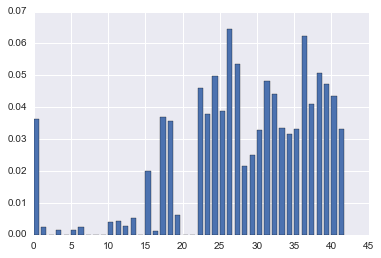

In [151]:
#グリッドサーチ
from sklearn.grid_search import GridSearchCV
params =  [{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 200], 
           'max_features':['auto', 'sqrt', 'log2', None]}]

model = GridSearchCV(RandomForestClassifier(oob_score=True),
                     params, cv=3, scoring='accuracy', n_jobs=-1)

model.fit(processed_dframe.ix[:, 1:43], processed_dframe.ix[: ,0])
for params, mean_score, all_scores in model.grid_scores_:
    print("{:.3f} (+/- {:.3f}) for {}".format(mean_score, all_scores.std() / 2, params))

#最適な識別きを
model = model.best_estimator_
print(model)
model.feature_importances_.reshape((1,42))

plt.bar(range(42),model.feature_importances_, width=0.7)
model.oob_score_


In [152]:
importance = DataFrame(model.feature_importances_)

In [153]:
processed_dframe.columns

Index(['血圧低下有無', '年齢', 'F', 'M', '糖尿病性腎症', '糖尿病', '腎硬化症', '慢性糸球体腎炎', '不明',
       '多発性嚢胞腎', 'IgA腎症', '妊娠中毒症 ', '腎移植後再導入', '巣状糸球体萎縮', '多発性血管炎性肉芽腫症',
       'ネフローゼ症候群', '透析年数', 'ADL', '身長', '体重', 'AVF', 'AVG', '表在化動脈', '心拍出量',
       '体脂肪量_体幹', '体脂肪量_右上腕', '体脂肪量_左上腕', '体脂肪量_右下肢', '体脂肪量_左下肢', '骨格筋量_体幹',
       '骨格筋量_右上腕', '骨格筋量_左上腕', '骨格筋量_右下肢', '骨格筋量_左下肢', '体水分量_体幹', '体水分量_右上腕',
       '体水分量_左上腕', '体水分量_右下肢', '体水分量_左下肢', 'TBW', 'ICW', 'ECW', 'ECWTBW',
       '体脂肪率'],
      dtype='object')

In [154]:
field=pd.Series(processed_dframe.columns[1:])

In [155]:
importance[1]= field

In [156]:
importance

,0,1
0,0.036448,年齢
1,0.002598,F
2,0.000000,M
3,0.001547,糖尿病性腎症
4,0.000000,糖尿病
5,0.001526,腎硬化症
6,0.002374,慢性糸球体腎炎
7,0.000000,不明
8,0.000000,多発性嚢胞腎
9,0.000000,IgA腎症


In [157]:
importance.sort_values(0).to_csv('importance_tuned.csv')
importance.sort_values(0)

,0,1
20,0.000000,AVG
2,0.000000,M
4,0.000000,糖尿病
7,0.000000,不明
8,0.000000,多発性嚢胞腎
9,0.000000,IgA腎症
21,0.000000,表在化動脈
14,0.000000,ネフローゼ症候群
16,0.001287,ADL
5,0.001526,腎硬化症


In [158]:
imp=importance.sort_values(0,ascending=False)[1]

In [159]:
imp = imp[0:20]

In [160]:
imp

26    体脂肪量_右下肢
36    体水分量_右下肢
27    体脂肪量_左下肢
38         TBW
24    体脂肪量_右上腕
31    骨格筋量_右下肢
39         ICW
22        心拍出量
32    骨格筋量_左下肢
40         ECW
37    体水分量_左下肢
25    体脂肪量_左上腕
23     体脂肪量_体幹
17          身長
0           年齢
18          体重
33     体水分量_体幹
41      ECWTBW
35    体水分量_左上腕
30    骨格筋量_左上腕
Name: 1, dtype: object

In [161]:
processed2=processed_dframe[imp]
processed2.head()

,体脂肪量_右下肢,体水分量_右下肢,体脂肪量_左下肢,TBW,体脂肪量_右上腕,骨格筋量_右下肢,ICW,心拍出量,骨格筋量_左下肢,ECW,体水分量_左下肢,体脂肪量_左上腕,体脂肪量_体幹,身長,年齢,体重,体水分量_体幹,ECWTBW,体水分量_左上腕,骨格筋量_左上腕
0,1.26,5.63,1.25,34.5,0.35,7.21,21.1,4.5,7.13,13.5,5.58,0.41,2.92,1.648,63,53.9,15.8,0.390,1.80,2.31
1,3.68,4.74,3.68,30.7,1.74,6.00,17.8,5.3,6.17,12.8,4.87,1.76,10.98,1.540,73,64.4,13.5,0.418,1.52,1.94
2,1.23,3.84,1.25,25.7,0.54,4.85,15.0,3.4,4.98,10.7,3.94,0.50,2.86,1.545,85,41.7,11.5,0.417,1.28,1.63
3,4.54,3.15,4.57,21.1,2.30,4.00,12.5,3.5,4.07,8.6,3.20,2.30,12.84,1.442,78,56.2,9.6,0.408,0.91,1.17
4,2.66,5.69,2.66,31.6,1.26,7.23,18.9,5.0,7.17,12.7,5.64,1.24,9.45,1.722,71,60.9,15.7,0.401,1.79,2.30


In [165]:
params =  [{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 200], 
           'max_features':['auto', 'sqrt', 'log2', None]}]
model2 = GridSearchCV(RandomForestClassifier(oob_score=True),params, cv=2, scoring=None, n_jobs=-1)

model2.fit(processed2, processed_dframe.ix[: ,0])
model2 = model2.best_estimator_

#model2.fit(processed2, processed_dframe.ix[: ,0])

#plt.bar(range(len(processed2,axis=1)),model2.feature_importances_, width=0.7)
model2.oob_score_

/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/omata/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.64000000000000001